In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tokens_addresses_to_names_dict = {
    "0x86f1e0420c26a858fc203a3645dd1a36868f18e5": "vBTC",
    "0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb": "vETH",
    "0x5faa136fc58b6136ffdaeaac320076c4865c070f": "vAVAX",
    "0xb24f50dd9918934ab2228be7a097411ca28f6c14": "vLUNA",
    "0x151bb01c79f4516c233948d69dae39869bccb737": "vSOL",
    "0x7161c3416e08abaa5cd38e68d9a28e43a694e037": "vCRV",
    "0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8": "vSAND",
    "0x2f198182ec54469195a4a06262a9431a42462373": "vLINK",
    "0x5f714b5347f0b5de9f9598e39840e176ce889b9c": "vATOM",
    "0x77d0cc9568605bfff32f918c8ffaa53f72901416": "vONE",
    "0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4": "vNEAR",
    "0x2db8d2db86ca3a4c7040e778244451776570359b": "vFTM",
    "0x7eada83e15acd08d22ad85a1dce92e5a257acb92": "vFLOW",
    "0xb6599bd362120dc70d48409b8a08888807050700": "vBNB",
    "0x9482aafdced6b899626f465e1fa0cf1b1418d797": "vPERP",
    "0xbe5de48197fc974600929196239e264ecb703ee8": "vMATIC",
    "0x34235c8489b06482a99bb7fcab6d7c467b92d248": "vAAVE",
    "0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2": "vAPE"
}

In [10]:
withdraws_df = pd.read_csv("withdraws.csv")
withdraws_df.drop(columns=["Unnamed: 0"], inplace=True)
withdraws_df["time"] = pd.to_datetime(withdraws_df["timestamp"], unit='s')
withdraws_df["day_of_year"] = withdraws_df["time"].dt.dayofyear

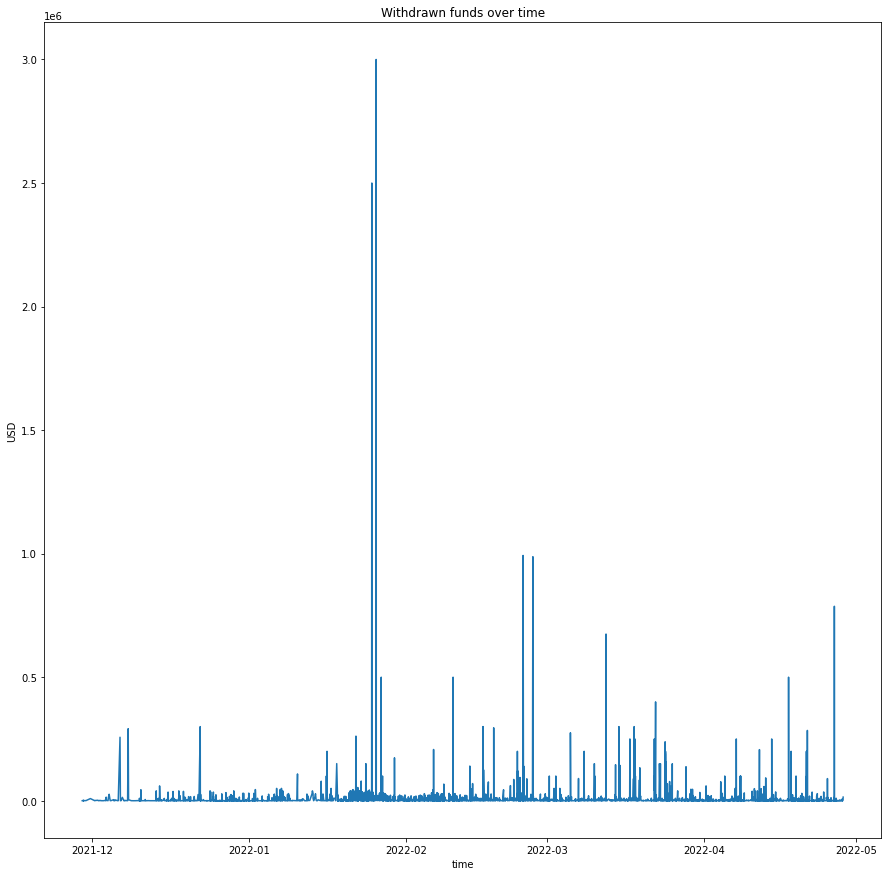

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(withdraws_df["time"], withdraws_df["amount"])
ax.set_xlabel("time")
ax.set_ylabel("USD")
ax.set_title("Withdrawn funds over time")
plt.show()

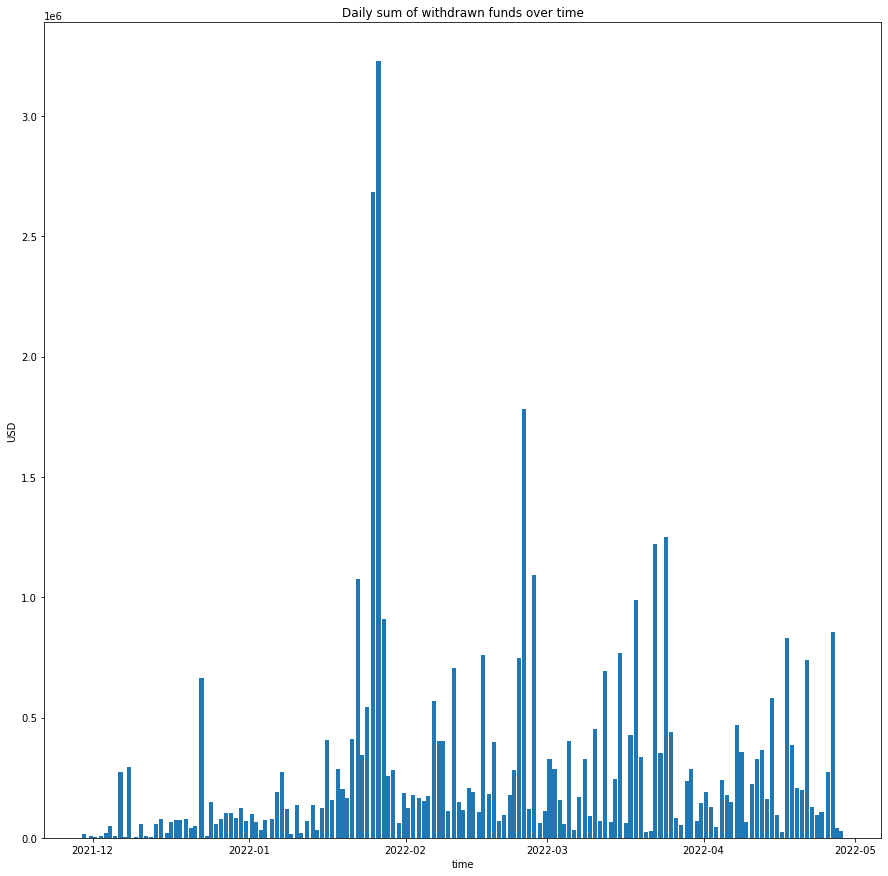

In [14]:
daily_withdraws_df = withdraws_df[["day_of_year", "amount"]].groupby("day_of_year").sum()
daily_timestamps_df = withdraws_df[["day_of_year" ,"timestamp"]].groupby("day_of_year").mean()
daily_timestamps_df["time"] = pd.to_datetime(daily_timestamps_df["timestamp"], unit='s')

daily_withdraws_df.sort_index(inplace=True)
daily_timestamps_df.sort_index(inplace=True)

fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(daily_timestamps_df["time"], daily_withdraws_df["amount"])
ax.set_xlabel("time")
ax.set_ylabel("USD")
ax.set_title("Daily sum of withdrawn funds over time")
plt.show()